#3. 언어 모델(Language Model)
단어 시퀀스(문장)에 확률을 할당하는 모델을 말함.  
-> 이 문장은 적절해! or 적절하지 않아!  

사람처럼 판단한다면 성능이 뛰어난것.  



#3-1 언어 모델(Language Model, LM)이란?

단어 시퀀스에 확률을 할당 하는 모델.  

방법 1 : 통계를 이용  
  - ㅁㄴㅇㄹ
  - ㅁㅁㅁㅁ
    
방법 2 : 인공 신경망을 이용
  - GPT - 제일 많이 씀.
  - BERT
  - TransformerXL
  - RoBERTa

##1. 언어 모델(Language Model)

언어 모델은 가장 자연스러운 단어 시퀀스를 찾아내는 모델

**1. 이전 단어들이 주어졌을 때 다음 단어를 예측**  
-> 약간 그리디 알고리즘 같음.  

**2. 양쪽 단어들이 주어졌을 때 그 사이 단어를 예측**  
-> 고등 영어 빈칸 추론 문제 같음.  
-> BERT 에서 다룰 예정
<br><br><br>
**언어 모델링(Language Modeling)**은 주어진 단어들로 부터 아직 모르는 단어를 예측하는 작업.

##2. 단어 시퀀스의 확률 할당


###a. 기계 번역(Machine Translation):
```
P(나는 버스를 탔다) > P(나는 버스를 태운다)
```  

###b. 오타 교정(Spell Correction):
```
선생님이 교실로 부리나케     
P(달려갔다) > P(잘려갔다)
```

###c. 음성 인식(Speech Recognition):
```
P(나는 메롱을 먹는다) < P(나는 메론을 먹는다)
```

이와 같이 확률을 통해 보다 적절한 문장을 판단함.

##3. 주어진 이전 단어들로부터 다음 단어 예측하기

###A. 단어 시퀀스의 확률
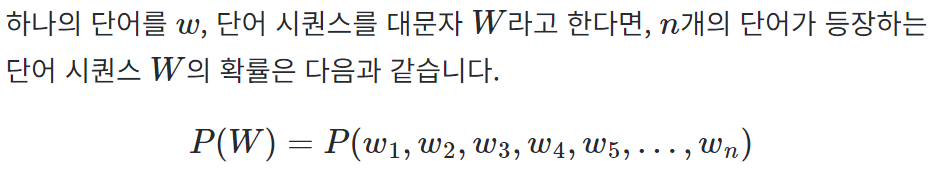

###B. 다음 단어 등장 확률
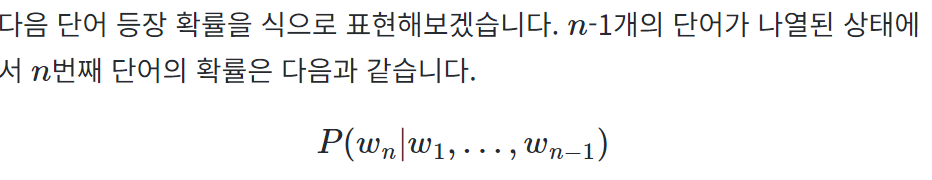

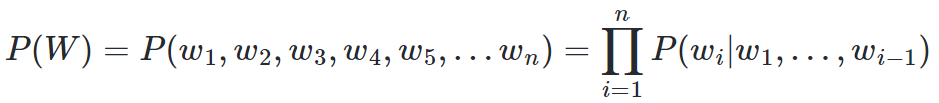

##4. 언어 모델의 간단한 직관

```  
비행기를 타려고 공항에 갔는데 지각을 하는 바람에 비행기를 [ ? ]  
```
사람들은 앞의 문장을 읽고 그 다음단어를 추론함.  

기계도 마찬가지.  
앞서 언급한 확률 식으로 다음 단어를 예측함.

##5. 검색 엔진에서의 언어 모델의 예


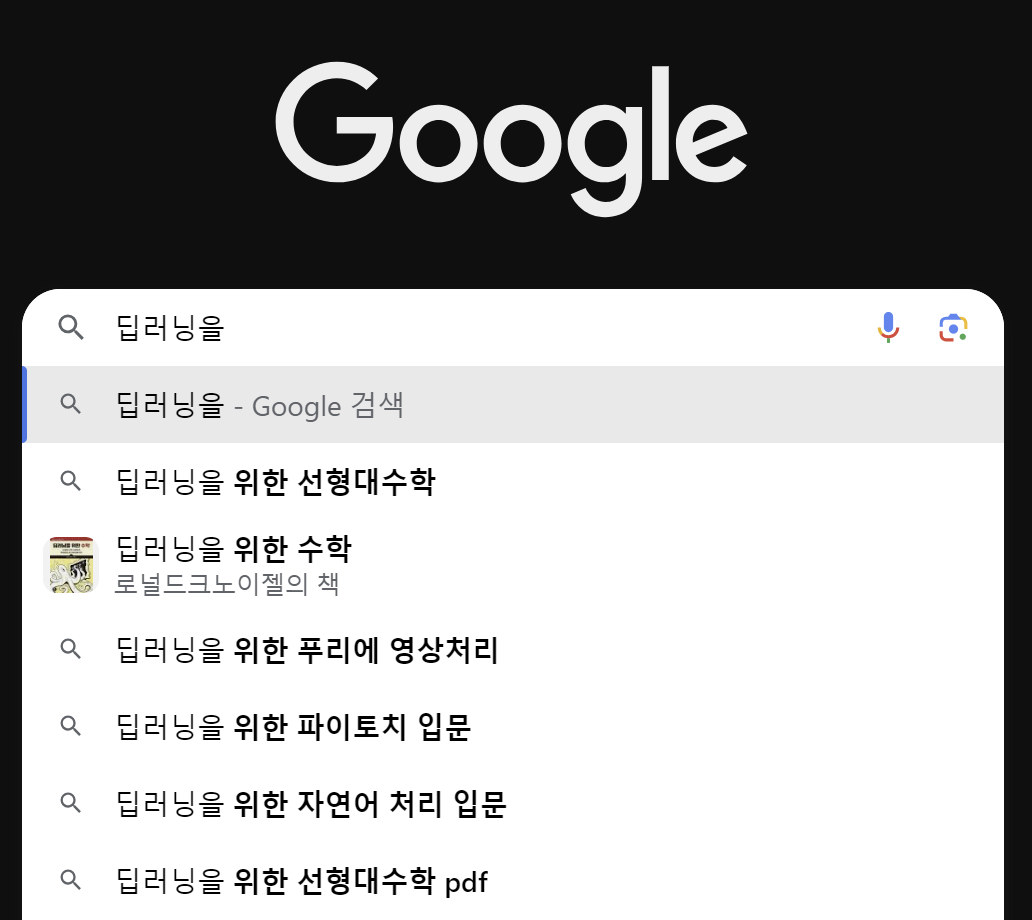

#3-2 통계적 언어 모델(Statistical Language Model, SLM)

##1. 조건부 확률

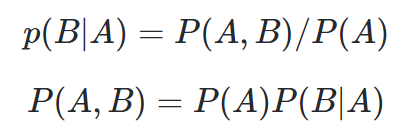
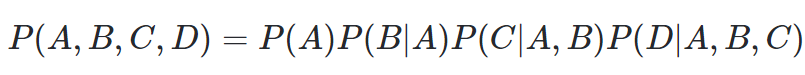
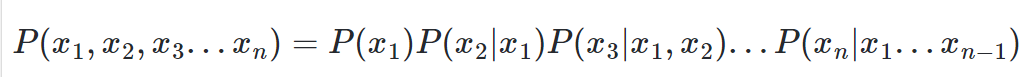

##2. 문장에 대한 확률

###P(An adorable little boy is spreading smiles)
= P(An) \* P(adorable | An) \* P(little | An adorable) \* P(boy | An adorable little) \*  
P(is | An adorable little boy) \* P(spreading | An adorable little boy is) \*  
P(smiles | An adorable little boy is spreading)

##3. 카운트 기반의 접근

문장의 확률을 구하는법은 학습 데이터에서 개수만 구하면 된다.  

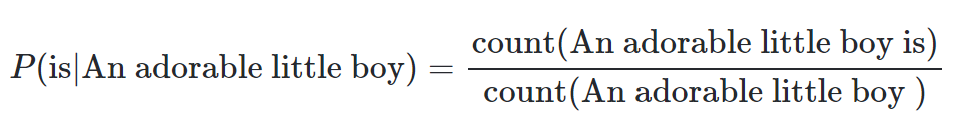
만약 count(An adorable little boy) 가 100이고,  
count (An adorable little boy is) 가 30 이면  
P(is | An adorable little boy)가 30% 이다.

##4. 카운트 기반 접근의 한계 - 희소 문제(Sparsity Problem)

카운트 기반의 접근은 코퍼스의 양이 방대할 것임.  

충분한 데이터를 관측하지 못하여 정확히 모델링 하지 못하는 문제를  
**희소 문제**라고 함.
<br><br><br>
해결법으론
- ngram 언어 모델
- 스무딩
- 백오프

(스무딩과 백오프는 이 책에 없음)  
하지만 희소 문제에 대한 근본적인 해결책은 되지 못함.

#3-3 N-gram 언어 모델(N-gram Language Model)

n-gram 언어 모델은 카운트에 기반한 통계적 접근을 사용함. SLM의 일종  

이전에 등장한 모든 단어를 고려하는 것이 아닌 일부 단어만 고려하는 접근 방법.  
이것이 n이 가지는 의미임.

##1. 코퍼스에서 카운트하지 못하는 경우의 감소.

확률을 계산하고 싶은 문장이나 단어가 없을 수 있고, 문장이 길어질수록 갖고있는 코퍼스에 그 문장이 없을 가능성이 높음.  
->> 카운트를 할 수 없음  

참고하는 단어들을 줄인다면 카운트 가능성을 높임.

##2. N-gram

임의의 개수를 정할 기준이 되는 것이 n-gram.  
n-gram은 연속적인 단어 나열  

- **uni**grams (1개)
- **bi**grams (2개)
- **tri**grams (3개)
- **n**-grams (4개 이상)

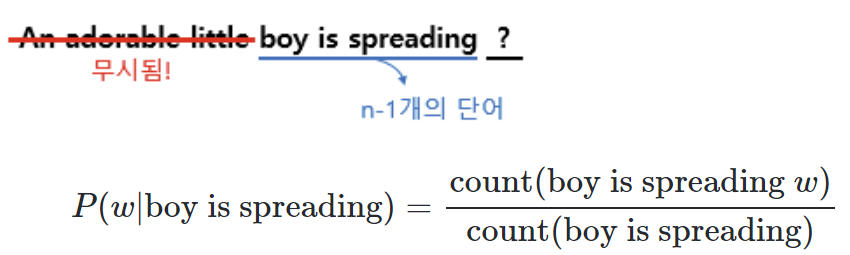


##3. N-gram Language Model의 한계

4-gram 언어 모델일 때, "작고 사랑스러운 소년이" 이 문장 다음에  
"모욕을 퍼트렸다."라는 부정적이 내용이 "웃음 지었다" 라는 긍정적인 내용 대신 선택되었을까?

이러한 문제 때문에 정확도가 떨어질 수 밖에 없다.  
그 외 문제점:  
  - 희소 문제(Sparsity Problem) : 카운트 할 확률만 높일 수 있다.
  - n을 선택하는 것은 trade-off 문제 :  
  n이 커진다면 모델이 커지고, 카운트할 수 있는 확률이적어져 희소 문제가 심각해짐.  
  n이 작아진다면 카운트는 잘 되지만 정확도가 떨어짐.

##4. 적용 분야(Domain)에 맞는 코퍼스의 수집

코퍼스 내용에 따라 모델 성능이 비약적으로 달라짐.  

예를 들어, 마케팅 분야에서는 마케팅 단어가 빈번하게 등장하는데,  
이런 코퍼스를 마케팅 관련 언어 모델에 사용한다면 성능이 높아 질 수 밖에 없음.

##5. 인공 신경망을 이용한 언어 모델(Neural Network Based Language Model)

여기서는 다루진 않았지만 여러 일반화 방법들이 존재하는데,  
n-gram언어 모델의 취약점을 완전히 해결하진 못함.  

요즘은 대체적으로 성능이 우수한 인공 신경망을 이용한 언어 모델을 많이 사용함.

#3-4 한국어에서의 언어 모델(Language Model for Korean Sentences)

영어에 비해 한국어 언어 모델이 예측하기 까다로움

##1. 한국어는 어순이 중요하지 않다.

```
1. 나는 운동을 합니다 체육관에서.  
2. 나는 체육관에서 운동을 합니다.  
3. 체육관에서 운동을 합니다.  
4. 나는 운동을 체육관에서 합니다.
```

모두 다 같은 의미이다.

##2. 한국어는 교착어이다.

한국어에는 조사가 있어서 '그녀'라는 단어 하나만 해도  
그녀가, 그녀를, 그녀의, 그녀와, 그녀로, 그녀께서, 그녀처럼 과 같이 너무 많이 존재함.

한국어에서는 토큰화를 통해 분리하는 것이 중요한 작업.

##3. 한국어는 띄어쓰기가 제대로 지켜지지 않는다.

#3-5 펄플렉서티(Perplexity, PPL)

모델 내에서 자신의 성능을 수치화하여 결과를 내놓는 것이 PPL

##1. 언어 모델의 평가 방법(Evaluation metric) : PPL

perplexed(헷갈리는)과 유사한 의미로, 여기서 PPL은 '헷갈리는 정도'라고 이해하자.  

낮을수록 모델 성능이 좋다는 것.  

PPL은 문장의 길이로 정규화된 문장 확률의 역수.  
문장W의 길이가 N이라고 하였을 때의 PPL은 다음과 같다
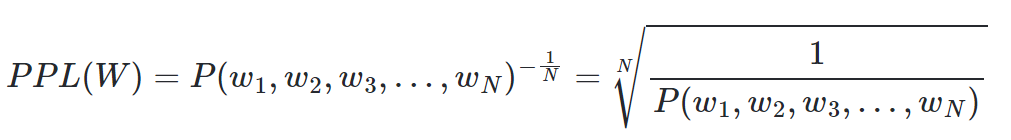
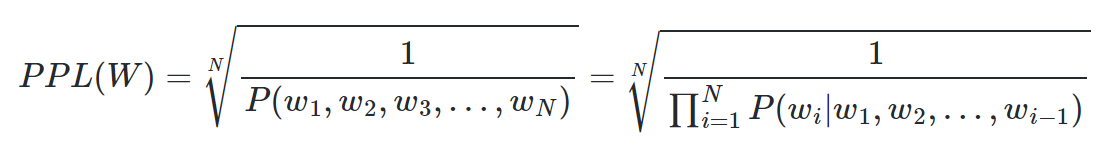


##2. 분기 계수(Branching factor)

PPL은 선택할 수 있는 가능한 경우의 수를 의미하는 분기계수(branching factor)이다.  

예를 들어 PPL이 10이다  
-> 다음 단어를 예측하는 모든 시점마다 평균 10개의 단어를 가지고 어떤 것이 정답인지 고민한다고 볼 수 있다.  
<br><br><br>
여기서 주의할 점:  
  테스트 데이터 상에서 높은 정확도를 보인다는 것.  
  사람이 느끼기에 좋은 언어 모델X

##3. 기존 언어 모델 Vs. 인공 신경망을 이용한 언어 모델.

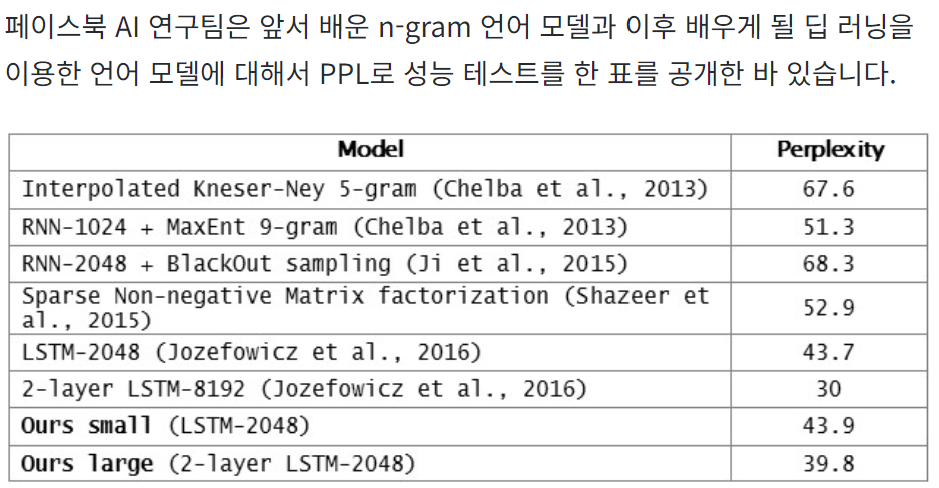

#3-6 조건부 확률(Conditional Probability)

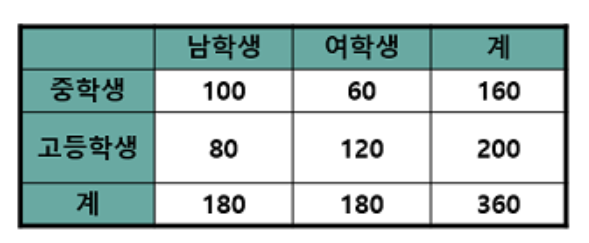